# INDIA ECONOMY - TIME SERIES ANALYSIS

This dataset provides a detailed view of India's economic performance trends from 1960 to 2020. It includes key metrics such as GDP, inflation and population.

Source : [Kaggle](https://www.kaggle.com/datasets/nejilee/indian-economy-from-1960-to-2020)

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the dataset with the correct header starting from row 2
df = pd.read_excel(r'C:/Manasi/NMIMS/Manasi/Time Series/Datasets/India_economy.xlsx', header = 2)
df.head()

,Year,Country Name,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
0,1960,India,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,India,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,India,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,India,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,India,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57


In [3]:
#Check for missing values
df.isnull().sum()

Year                                             0
Country Name                                     0
GDP (current US$)                                0
 GDP per capita (current US$)                    0
GDP growth (annual %)                            0
Imports of goods and services (% of GDP)         0
Exports of goods and services (% of GDP)         0
 Total reserves (includes gold, current US$)     0
Inflation, consumer prices (annual %)            0
Population, total                                0
Population growth (annual %)                     0
Life expectancy at birth, total (years)          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           61 non-null     int64  
 1   Country Name                                   61 non-null     object 
 2   GDP (current US$)                              61 non-null     float64
 3    GDP per capita (current US$)                  61 non-null     int64  
 4   GDP growth (annual %)                          61 non-null     float64
 5   Imports of goods and services (% of GDP)       61 non-null     float64
 6   Exports of goods and services (% of GDP)       61 non-null     float64
 7    Total reserves (includes gold, current US$)   61 non-null     float64
 8   Inflation, consumer prices (annual %)          61 non-null     float64
 9   Population, total                              61 non-nu

In [5]:
# Convert Year column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Year                                           61 non-null     datetime64[ns]
 1   Country Name                                   61 non-null     object        
 2   GDP (current US$)                              61 non-null     float64       
 3    GDP per capita (current US$)                  61 non-null     int64         
 4   GDP growth (annual %)                          61 non-null     float64       
 5   Imports of goods and services (% of GDP)       61 non-null     float64       
 6   Exports of goods and services (% of GDP)       61 non-null     float64       
 7    Total reserves (includes gold, current US$)   61 non-null     float64       
 8   Inflation, consumer prices (annual %)          61 non-null    

In [6]:
#Generate summary statistics for the dataset
des = df.describe()
summary = des.applymap(lambda x: f'{x:,.2f}')
summary

,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
count,61.00,61.00,61.00,61.00,61.00,61.00,61.00,61.00,61.00,61.00
mean,"658,472,481,990.05",575.56,4.94,12.75,10.89,"98,022,273,223.53",7.41,"891,394,550.15",1.93,57.15
std,"812,960,566,357.67",584.08,3.34,8.16,7.06,"149,710,187,041.46",4.94,"297,449,648.66",0.42,8.46
min,"37,029,883,876.18",82.00,-7.25,3.71,3.31,"499,145,125.79",-7.63,"445,954,579.00",0.96,41.13
25%,"99,525,899,116.05",161.00,3.72,6.59,5.20,"2,324,650,346.60",4.01,"623,524,219.00",1.62,50.63
50%,"288,208,430,383.96",340.00,5.53,8.57,7.05,"11,511,740,598.81",6.67,"870,452,165.00",2.15,57.66
75%,"820,381,595,512.90",715.00,7.45,19.64,18.69,"137,824,828,256.29",10.02,"1,154,638,713.00",2.26,64.31
max,"2,831,552,222,519.99","2,101.00",9.63,31.26,25.43,"590,227,359,928.90",28.60,"1,396,387,127.00",2.34,69.73


In [7]:
# Univariate column
gdp_growth = df.set_index('Year')['GDP growth (annual %)']
gdp_growth

Year
1960-01-01    0.00
1961-01-01    3.72
1962-01-01    2.93
1963-01-01    5.99
1964-01-01    7.45
              ... 
2016-01-01    8.26
2017-01-01    6.80
2018-01-01    6.53
2019-01-01    4.04
2020-01-01   -7.25
Name: GDP growth (annual %), Length: 61, dtype: float64

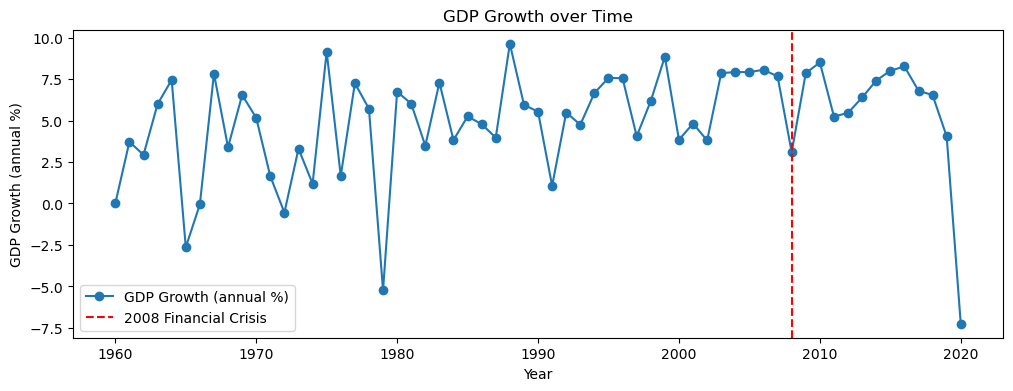

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(gdp_growth, label='GDP Growth (annual %)', marker='o')
plt.title('GDP Growth over Time')
plt.xlabel('Year')
plt.ylabel('GDP Growth (annual %)')
plt.axvline(x=pd.to_datetime('2008-01-01'), color='red', linestyle='--', label='2008 Financial Crisis')
plt.legend()
plt.show()

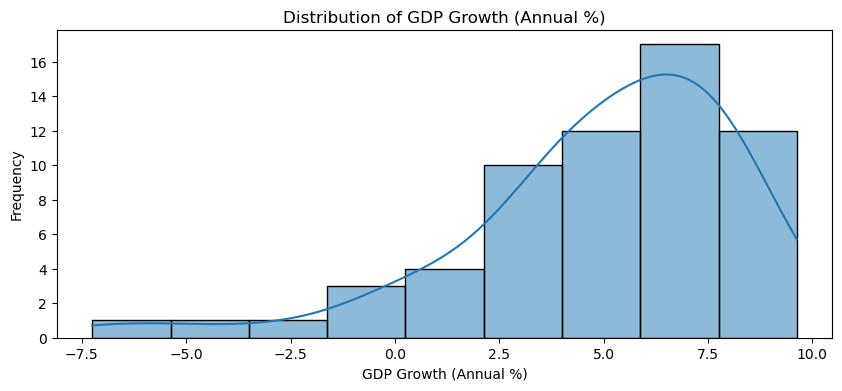

In [9]:
# Histogram for GDP growth distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['GDP growth (annual %)'], kde=True)
plt.title('Distribution of GDP Growth (Annual %)')
plt.xlabel('GDP Growth (Annual %)')
plt.ylabel('Frequency')
plt.show()

# Check for stationarity

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
# Perform ADF test
adf_result = adfuller(df['GDP growth (annual %)'])

# Extract results
adf_stat = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

# Print ADF test results
print(f'ADF Statistic: {adf_stat}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Check if the series is stationary
if p_value < 0.05 and adf_stat < critical_values['5%']:
    print("The data is stationary.")
else:
    print("The data is not stationary.")

ADF Statistic: -6.2034359009962765
p-value: 5.7333038923524575e-08
Critical Values:
   1%: -3.5443688564814813
   5%: -2.9110731481481484
   10%: -2.5931902777777776
The data is stationary.


# ACF and PACF plot

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

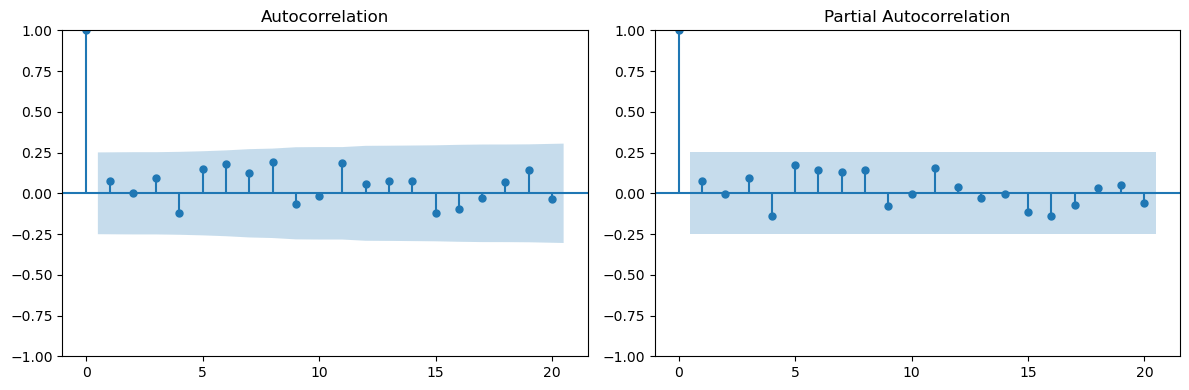

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(df['GDP growth (annual %)'].dropna(), lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['GDP growth (annual %)'].dropna(), lags=20, ax=plt.gca())
plt.tight_layout()
plt.show()

In [14]:
import warnings
from itertools import product
from statsmodels.tsa.arima.model import ARIMA

In [15]:
# Set up parameter ranges for ARIMA
p = range(0, 8)  # Autoregressive terms
d = range(0, 2)  # Differencing
q = range(0, 8)  # Moving average terms

pdq = list(product(p, d, q))
results = []

warnings.filterwarnings("ignore")

for param in pdq:
    try:
        model = ARIMA(df['GDP growth (annual %)'].dropna(), order=param, enforce_stationarity=False)
        model_fit = model.fit()
        
        results.append({
            'Model': 'ARIMA',
            'p': param[0],
            'd': param[1],
            'q': param[2],
            'AIC': model_fit.aic
        })
    except Exception as e:
        print(f"ARIMA fitting failed for parameters {param}: {e}")
        continue

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
results_df

,Model,p,d,q,AIC
0,ARIMA,5,1,7,278.009947
1,ARIMA,4,1,7,279.176973
2,ARIMA,4,1,6,280.509331
3,ARIMA,2,1,7,280.626285
4,ARIMA,6,1,7,280.718103
...,...,...,...,...,...
123,ARIMA,2,0,1,317.717077
124,ARIMA,1,0,0,318.466564
125,ARIMA,2,1,0,319.997326
126,ARIMA,1,1,0,330.401131


# AR Model

In [16]:
ar_model = ARIMA(df['GDP growth (annual %)'], order=(5, 0, 0), enforce_stationarity=False).fit()
print(ar_model.summary())

                                 SARIMAX Results                                 
Dep. Variable:     GDP growth (annual %)   No. Observations:                   61
Model:                    ARIMA(5, 0, 0)   Log Likelihood                -145.017
Date:                   Sat, 12 Oct 2024   AIC                            304.034
Time:                           15:32:05   BIC                            318.212
Sample:                                0   HQIC                           309.531
                                    - 61                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9882      0.799      6.247      0.000       3.423       6.553
ar.L1          0.1382      0.179      0.773      0.439      -0.212       0.489
ar.L2         -0.0650      0

# MA Model

In [17]:
ma_model = ARIMA(df['GDP growth (annual %)'], order=(0,0,7), enforce_stationarity=False).fit()
print(ma_model.summary())

                                 SARIMAX Results                                 
Dep. Variable:     GDP growth (annual %)   No. Observations:                   61
Model:                    ARIMA(0, 0, 7)   Log Likelihood                -131.573
Date:                   Sat, 12 Oct 2024   AIC                            281.146
Time:                           15:32:06   BIC                            298.879
Sample:                                0   HQIC                           287.965
                                    - 61                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0885      0.849      5.996      0.000       3.425       6.752
ma.L1         -0.1135      6.050     -0.019      0.985     -11.972      11.745
ma.L2         -0.0556      8

# ARMA Model

In [18]:
arma_model = ARIMA(df['GDP growth (annual %)'], order=(5,0,7), enforce_stationarity=False).fit()
print(arma_model.summary())

                                 SARIMAX Results                                 
Dep. Variable:     GDP growth (annual %)   No. Observations:                   61
Model:                    ARIMA(5, 0, 7)   Log Likelihood                -128.674
Date:                   Sat, 12 Oct 2024   AIC                            285.348
Time:                           15:32:07   BIC                            312.932
Sample:                                0   HQIC                           295.956
                                    - 61                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0021      1.293      3.870      0.000       2.469       7.536
ar.L1          0.4026      0.303      1.329      0.184      -0.191       0.996
ar.L2         -0.1211      0

# ARIMA Model

In [19]:
arima_model = ARIMA(df['GDP growth (annual %)'], order=(5,1,7), enforce_stationarity=False).fit()
print(arima_model.summary())

                                 SARIMAX Results                                 
Dep. Variable:     GDP growth (annual %)   No. Observations:                   61
Model:                    ARIMA(5, 1, 7)   Log Likelihood                -126.005
Date:                   Sat, 12 Oct 2024   AIC                            278.010
Time:                           15:32:08   BIC                            303.376
Sample:                                0   HQIC                           287.735
                                    - 61                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9480      0.326     -2.905      0.004      -1.587      -0.308
ar.L2         -0.5118      0.443     -1.154      0.248      -1.381       0.357
ar.L3         -0.3765      0

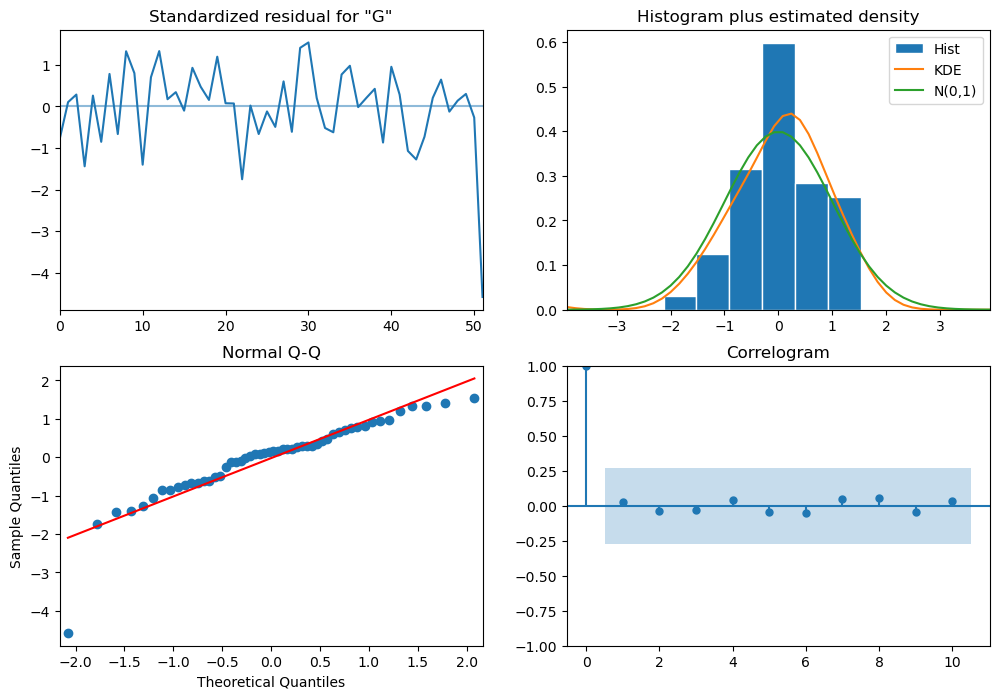

In [20]:
arima_model.plot_diagnostics(figsize=(12, 8))
plt.show()

In [21]:
print(df[['Year', 'GDP growth (annual %)']].tail())

         Year  GDP growth (annual %)
56 2016-01-01                   8.26
57 2017-01-01                   6.80
58 2018-01-01                   6.53
59 2019-01-01                   4.04
60 2020-01-01                  -7.25


In [22]:
arima_model = ARIMA(gdp_growth, order=(5, 1, 7))
arima_result = arima_model.fit()

forecast_steps = 5
forecast = arima_result.forecast(steps=forecast_steps)
forecast_years = pd.date_range(start='2021', periods=forecast_steps, freq='Y')

forecast.index = forecast_years
print(forecast)

2021-12-31     8.930570
2022-12-31     9.283666
2023-12-31     8.283335
2024-12-31    11.262995
2025-12-31     4.964131
Freq: A-DEC, Name: predicted_mean, dtype: float64


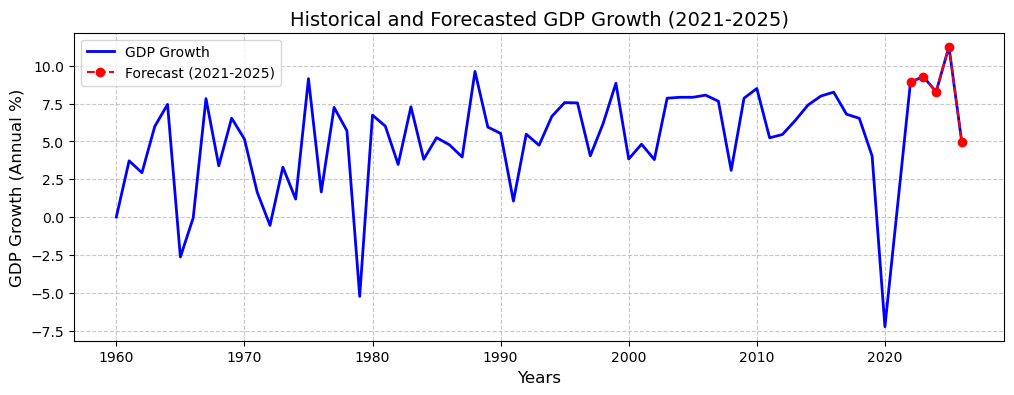

In [23]:
combined_years = gdp_growth.index.append(forecast_years)
combined_growth = gdp_growth.append(forecast)

plt.figure(figsize=(12, 4))
plt.plot(combined_years, combined_growth, label='GDP Growth', color='blue', linewidth=2)
plt.plot(forecast_years, forecast, label='Forecast (2021-2025)', 
         linestyle='--', marker='o', color='red', markersize=6)

plt.xlabel('Years', fontsize=12)
plt.ylabel('GDP Growth (Annual %)', fontsize=12)
plt.title('Historical and Forecasted GDP Growth (2021-2025)', fontsize=14)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

# SARIMA Model

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [25]:
seasonal_period = 12

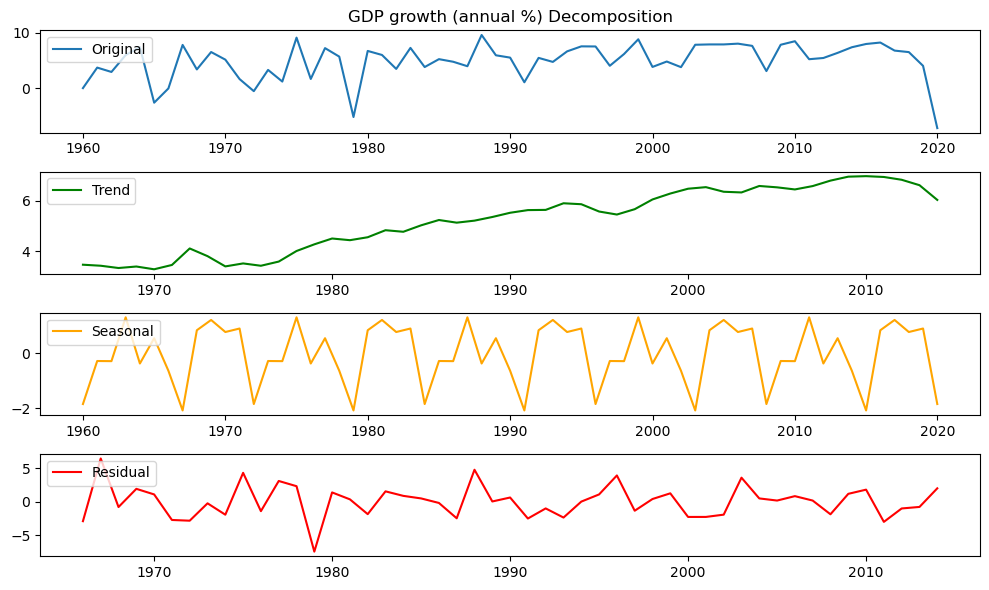

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the GDP growth series (assuming period = 12 for yearly seasonality)
decomposition = seasonal_decompose(gdp_growth, model='additive', period=12)

# Plot the decomposition in a single plot
plt.figure(figsize=(10, 6))

# Plot the original data
plt.subplot(4, 1, 1)
plt.plot(gdp_growth, label='Original')
plt.title('GDP growth (annual %) Decomposition')
plt.legend(loc='upper left')

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend(loc='upper left')

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='orange')
plt.legend(loc='upper left')

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [27]:
p, d, q = 0, 1, 1
P, D, Q, m = 0, 1, 1, seasonal_period 

In [28]:
sarima_model = SARIMAX(gdp_growth, order=(p, d, q), seasonal_order=(P, D, Q, m))
sarima_result = sarima_model.fit()

print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:              GDP growth (annual %)   No. Observations:                   61
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -135.548
Date:                            Sat, 12 Oct 2024   AIC                            277.096
Time:                                    15:32:13   BIC                            282.710
Sample:                                01-01-1960   HQIC                           279.218
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9333      0.251     -3.711      0.000      -1.426      -0.440
ma.S.L12      -0.9978    102.484   

In [29]:
forecast_steps = 5
sarima_forecast = sarima_result.forecast(steps=forecast_steps)

# Generate correct future dates (2021-2025)
forecast_years = pd.date_range(start='2021', periods=forecast_steps, freq='Y')

# Display forecast with correct years
sarima_forecast.index = forecast_years
print(sarima_forecast)

2021-12-31    6.118437
2022-12-31    5.998466
2023-12-31    7.922409
2024-12-31    6.890417
2025-12-31    5.636453
Freq: A-DEC, Name: predicted_mean, dtype: float64


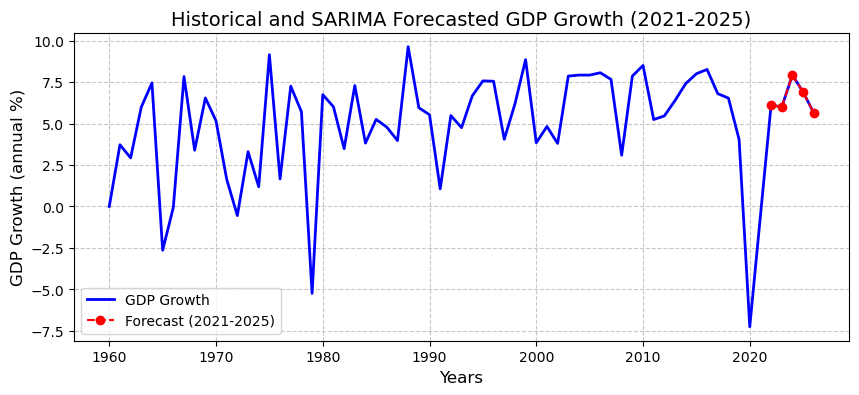

In [30]:
combined_growth = pd.concat([gdp_growth, pd.Series(sarima_forecast, index=forecast_years)])

plt.figure(figsize=(10, 4))
plt.plot(combined_growth.index, combined_growth, label='GDP Growth', color='blue', linewidth=2)
plt.plot(forecast_years, sarima_forecast, marker='o', linestyle='--', 
         color='red', markersize=6, label='Forecast (2021-2025)')

plt.xlabel('Years', fontsize=12)
plt.ylabel('GDP Growth (annual %)', fontsize=12)
plt.title('Historical and SARIMA Forecasted GDP Growth (2021-2025)', fontsize=14)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

# ARCH GARCH Models

In [31]:
from arch import arch_model

def fit_arch_garch(p, q, data):
    # Fit an ARCH model
    arch_model_result = arch_model(data, vol='ARCH', p=p).fit(disp='off')
    aic_arch = arch_model_result.aic

    # Fit a GARCH model
    garch_model_result = arch_model(data, vol='Garch', p=p, q=q).fit(disp='off')
    aic_garch = garch_model_result.aic

    return (p, aic_arch, arch_model_result), (p, q, aic_garch, garch_model_result)

In [32]:
arch_models_aic = []
garch_models_aic = []

# For ARCH models
for p in range(1, 4):
    arch_model_result = arch_model(df['GDP growth (annual %)'], vol='ARCH', p=p).fit(disp='off')
    arch_models_aic.append(('ARCH', p, arch_model_result.aic))

# For GARCH models
for p in range(1, 6):
    for q in range(1, 6): 
        garch_model_result = arch_model(df['GDP growth (annual %)'], vol='Garch', p=p, q=q).fit(disp='off')
        garch_models_aic.append(('GARCH', p, q, garch_model_result.aic))

# Sort models by AIC values in asc order
arch_models_aic.sort(key=lambda x: x[2])
garch_models_aic.sort(key=lambda x: x[3])

# Print ARCH models with their AIC values
print("ARCH Models and their AIC values:")
for model in arch_models_aic:
    p = model[1]
    aic = model[2]
    print(f'ARCH(p={p}): AIC={aic:.2f}')

# Print GARCH models with their AIC values
print("\nGARCH Models and their AIC values:")
for model in garch_models_aic:
    p, q = model[1], model[2]
    aic = model[3]
    print(f'GARCH(p={p}, q={q}): AIC={aic:.2f}')

ARCH Models and their AIC values:
ARCH(p=1): AIC=325.41
ARCH(p=2): AIC=327.41
ARCH(p=3): AIC=329.41

GARCH Models and their AIC values:
GARCH(p=1, q=1): AIC=327.38
GARCH(p=1, q=2): AIC=329.21
GARCH(p=2, q=1): AIC=329.38
GARCH(p=2, q=2): AIC=331.21
GARCH(p=1, q=3): AIC=331.22
GARCH(p=3, q=1): AIC=331.38
GARCH(p=5, q=1): AIC=331.40
GARCH(p=4, q=1): AIC=332.01
GARCH(p=3, q=2): AIC=333.21
GARCH(p=2, q=3): AIC=333.22
GARCH(p=1, q=4): AIC=333.22
GARCH(p=5, q=2): AIC=333.40
GARCH(p=4, q=2): AIC=334.01
GARCH(p=3, q=3): AIC=335.22
GARCH(p=2, q=4): AIC=335.22
GARCH(p=1, q=5): AIC=335.22
GARCH(p=5, q=3): AIC=335.40
GARCH(p=4, q=3): AIC=335.97
GARCH(p=3, q=4): AIC=337.22
GARCH(p=2, q=5): AIC=337.22
GARCH(p=4, q=4): AIC=337.97
GARCH(p=4, q=5): AIC=339.11
GARCH(p=3, q=5): AIC=339.22
GARCH(p=5, q=4): AIC=339.97
GARCH(p=5, q=5): AIC=340.66


In [33]:
#Fit ARCH Model
arch_model_fit = arch_model(df['GDP growth (annual %)'], vol='ARCH', p=1, rescale=False)
arch_fit_result = arch_model_fit.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 159.89872995513818
Iteration:      2,   Func. Count:      9,   Neg. LLF: 159.7621365245716
Iteration:      3,   Func. Count:     13,   Neg. LLF: 159.70627875259765
Iteration:      4,   Func. Count:     17,   Neg. LLF: 159.70459973092534
Iteration:      5,   Func. Count:     21,   Neg. LLF: 159.70458524431965
Iteration:      6,   Func. Count:     24,   Neg. LLF: 159.70458531401522
Optimization terminated successfully    (Exit mode 0)
            Current function value: 159.70458524431965
            Iterations: 6
            Function evaluations: 24
            Gradient evaluations: 6


In [34]:
#Model Summary for ARCH Model
print("ARCH Model Summary:")
print(arch_fit_result.summary())

ARCH Model Summary:
                        Constant Mean - ARCH Model Results                       
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.000
Mean Model:                Constant Mean   Adj. R-squared:                  0.000
Vol Model:                          ARCH   Log-Likelihood:               -159.705
Distribution:                     Normal   AIC:                           325.409
Method:               Maximum Likelihood   BIC:                           331.742
                                           No. Observations:                   61
Date:                   Sat, Oct 12 2024   Df Residuals:                       60
Time:                           15:32:18   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             4.9381  

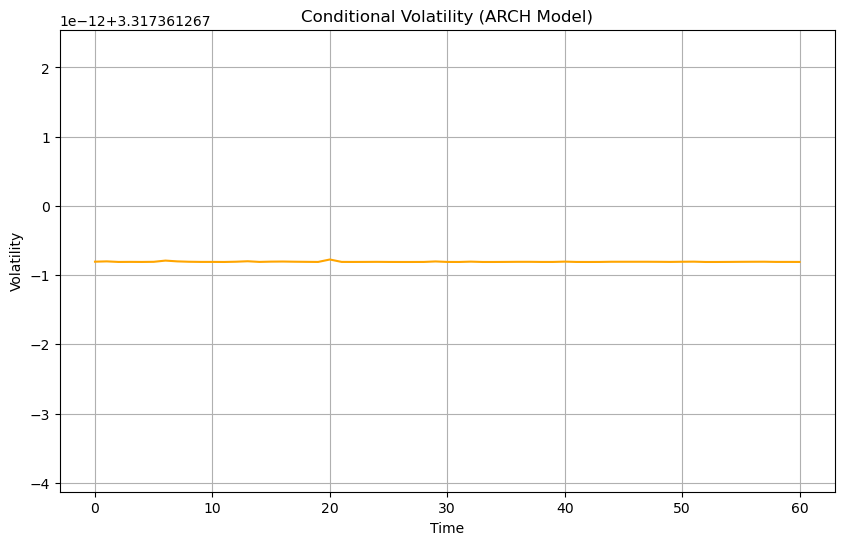

In [35]:
#Plot Conditional Volatility from ARCH Model
plt.figure(figsize=(10, 6))
plt.plot(arch_fit_result.conditional_volatility, color='orange')

plt.title("Conditional Volatility (ARCH Model)")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()

In [36]:
# Forecasting Volatility with ARCH for the nexxt 15 periods
forecast_period = 15 
arch_forecast = arch_fit_result.forecast(horizon=forecast_period)
predicted_volatility = np.sqrt(arch_forecast.variance.values[-1, :])

# Print the forecasted volatility
print(f"Predicted volatility for the next {forecast_period} periods:")
print(predicted_volatility)

Predicted volatility for the next 15 periods:
[3.31736127 3.31736127 3.31736127 3.31736127 3.31736127 3.31736127
 3.31736127 3.31736127 3.31736127 3.31736127 3.31736127 3.31736127
 3.31736127 3.31736127 3.31736127]


In [37]:
#Fit GARCH Model (both ARCH and GARCH components)
garch_model_fit = arch_model(df['GDP growth (annual %)'], vol='Garch', p=5, q=5, rescale=False)
garch_fit_result = garch_model_fit.fit()

Iteration:      1,   Func. Count:     14,   Neg. LLF: 198.1198042321307
Iteration:      2,   Func. Count:     29,   Neg. LLF: 159.6682118159489
Iteration:      3,   Func. Count:     42,   Neg. LLF: 159.64055224346296
Iteration:      4,   Func. Count:     55,   Neg. LLF: 159.63860646161342
Iteration:      5,   Func. Count:     68,   Neg. LLF: 159.63470838809482
Iteration:      6,   Func. Count:     81,   Neg. LLF: 159.63291495644876
Iteration:      7,   Func. Count:     94,   Neg. LLF: 159.6266908879998
Iteration:      8,   Func. Count:    107,   Neg. LLF: 159.6215234156742
Iteration:      9,   Func. Count:    120,   Neg. LLF: 159.6119923516829
Iteration:     10,   Func. Count:    133,   Neg. LLF: 159.61107533518899
Iteration:     11,   Func. Count:    146,   Neg. LLF: 159.6102561839321
Iteration:     12,   Func. Count:    159,   Neg. LLF: 159.6100997905343
Iteration:     13,   Func. Count:    173,   Neg. LLF: 159.60522356608018
Iteration:     14,   Func. Count:    186,   Neg. LLF: 159.

In [38]:
print("GARCH Model Summary:")
print(garch_fit_result.summary())

GARCH Model Summary:
                       Constant Mean - GARCH Model Results                       
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.000
Mean Model:                Constant Mean   Adj. R-squared:                  0.000
Vol Model:                         GARCH   Log-Likelihood:               -158.329
Distribution:                     Normal   AIC:                           340.657
Method:               Maximum Likelihood   BIC:                           365.988
                                           No. Observations:                   61
Date:                   Sat, Oct 12 2024   Df Residuals:                       60
Time:                           15:32:19   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             5.0998 

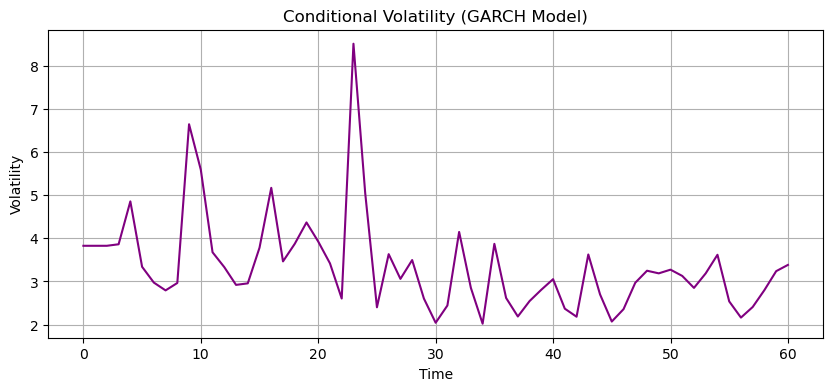

In [39]:
#Plot Conditional Volatility from GARCH Model
plt.figure(figsize=(10, 4))
plt.plot(garch_fit_result.conditional_volatility, color='purple')

# Formatting the plot
plt.title("Conditional Volatility (GARCH Model)")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.grid(True)

# Show the plot
plt.show()

In [40]:
#Forecasting Volatility with GARCH for the next 15 periods
garch_forecast_period = 15 
garch_forecast_results = garch_fit_result.forecast(horizon=garch_forecast_period)
garch_predicted_volatility = np.sqrt(garch_forecast_results.variance.values[-1, :])

# Print the forecasted volatility
print(f"Forecasted volatility for the next {garch_forecast_period} periods using GARCH:")
print(garch_predicted_volatility)

Forecasted volatility for the next 15 periods using GARCH:
[2.70756712 2.44831547 2.36269603 9.9844772  5.89543863 2.97333364
 4.27249064 8.36213087 7.21327378 4.40016061 4.87377118 7.52438188
 7.47687221 5.58283434 5.34810054]


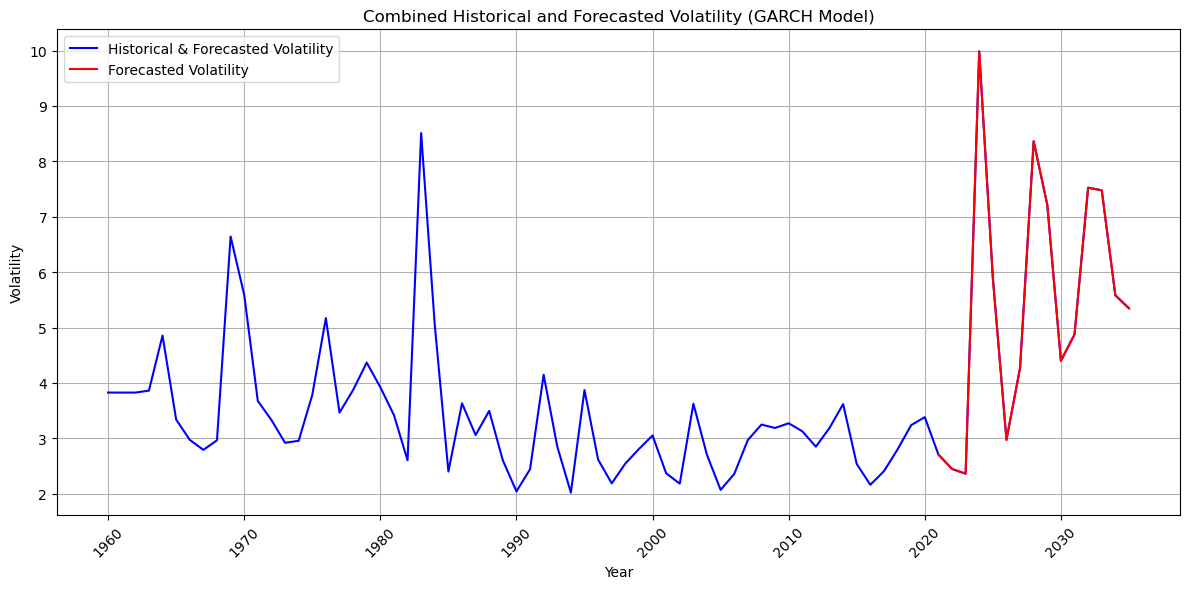

In [41]:
last_year = df['Year'].dt.year.iloc[-1]
forecast_years = pd.date_range(start=f'{last_year + 1}', periods=garch_forecast_period, freq='Y').year

# Combine historical and forecasted volatility
combined_volatility = np.concatenate([garch_fit_result.conditional_volatility, garch_predicted_volatility])

# Combine historical and forecasted years
combined_years = pd.concat([df['Year'], pd.Series(pd.to_datetime(forecast_years, format='%Y'))])

# Plot historical and forecasted volatility
plt.figure(figsize=(12, 6))
plt.plot(combined_years, combined_volatility, label="Historical & Forecasted Volatility", color='blue')
plt.plot(pd.to_datetime(forecast_years, format='%Y'), garch_predicted_volatility, label="Forecasted Volatility", color='red')

plt.title("Combined Historical and Forecasted Volatility (GARCH Model)")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

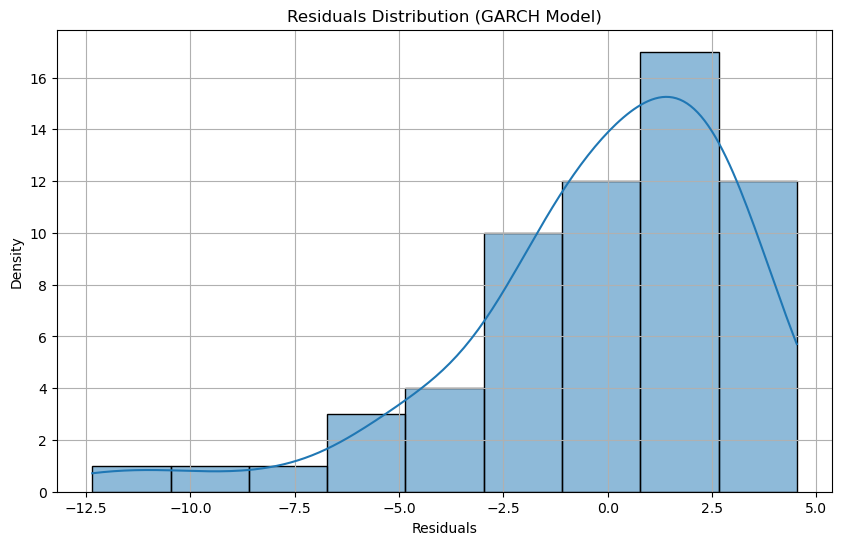

In [42]:
residuals = garch_fit_result.resid

# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution (GARCH Model)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.grid(True)
plt.show()

# VAR Model

In [43]:
#Check for Stationarity Using the Augmented Dickey-Fuller (ADF) Test
def adf_test(series, series_name):
    result = adfuller(series.dropna())
    print(f"\nADF Statistic for {series_name}: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

In [44]:
adf_test(df['GDP (current US$) '], "GDP (current US$)")
adf_test(df['GDP growth (annual %)'], "GDP growth (annual %)")
adf_test(df['Inflation, consumer prices (annual %)'], "Inflation (annual %)")
adf_test(df['Population growth (annual %)'], "Population growth (annual %)")


ADF Statistic for GDP (current US$): -0.9888830111703866
p-value: 0.7572973414228619
Critical Values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}

ADF Statistic for GDP growth (annual %): -6.2034359009962765
p-value: 5.7333038923524575e-08
Critical Values: {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}

ADF Statistic for Inflation (annual %): -4.853443951169605
p-value: 4.293062853742447e-05
Critical Values: {'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}

ADF Statistic for Population growth (annual %): 1.732551906370992
p-value: 0.9982054286440561
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}


In [45]:
# Differencing GDP and Population growth to make it stationary
df['GDP (current US$) '] = df['GDP (current US$) '].diff()
adf_test(df['GDP (current US$) '], "Differenced GDP (current US$)")

df['Population growth diff'] = df['Population growth (annual %)'].diff()
adf_test(df['Population growth diff'], "Differenced Population growth (annual %)")


ADF Statistic for Differenced GDP (current US$): 0.5904045410573393
p-value: 0.9873767141002597
Critical Values: {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}

ADF Statistic for Differenced Population growth (annual %): -3.1489100643214445
p-value: 0.023139059826059242
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}


In [46]:
# Apply differencing to the log-transformed GDP data
df['GDP_log'] = np.log(df['GDP (current US$) '])
df['GDP_log_diff'] = df['GDP_log'].diff()

# Perform ADF test on the log-differenced data
adf_result_gdp_log_diff = adfuller(df['GDP_log_diff'].dropna())

# ADF test results after log differencing
adf_stat_log_diff = adf_result_gdp_log_diff[0]
p_value_log_diff = adf_result_gdp_log_diff[1]
critical_values_log_diff = adf_result_gdp_log_diff[4]

adf_stat_log_diff, p_value_log_diff, critical_values_log_diff

(-6.999371587744769,
 7.389841140290676e-10,
 {'1%': -3.596635636000432,
  '5%': -2.933297331821618,
  '10%': -2.6049909750566895})

In [47]:
df['Inflation_diff'] = df['Inflation, consumer prices (annual %)'].diff()
df['Population_growth_diff'] = df['Population growth (annual %)'].diff()

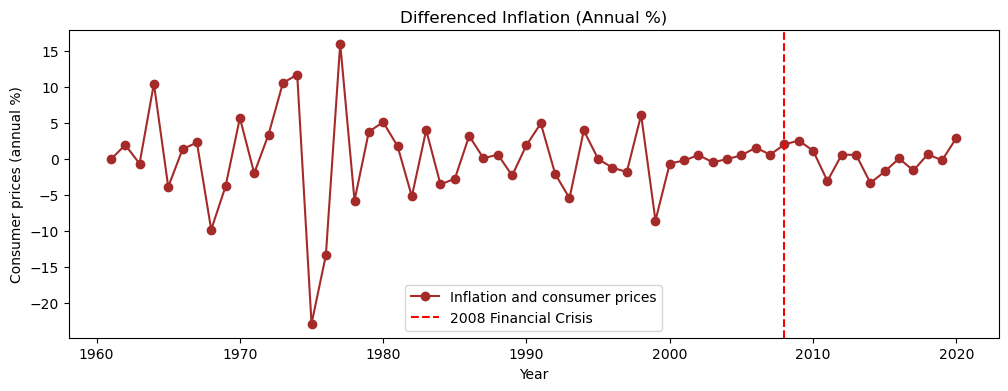

In [48]:
#Plot the Inflation Data Over Time
inflation = df.set_index('Year')['Inflation_diff']

plt.figure(figsize=(12, 4))
plt.plot(inflation, label='Inflation and consumer prices', marker='o', color = 'brown')
plt.title('Differenced Inflation (Annual %)')
plt.xlabel('Year')
plt.ylabel('Consumer prices (annual %)')
plt.axvline(x=pd.to_datetime('2008-01-01'), color='red', linestyle='--', label='2008 Financial Crisis')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Differenced Population Growth (Annual %)')

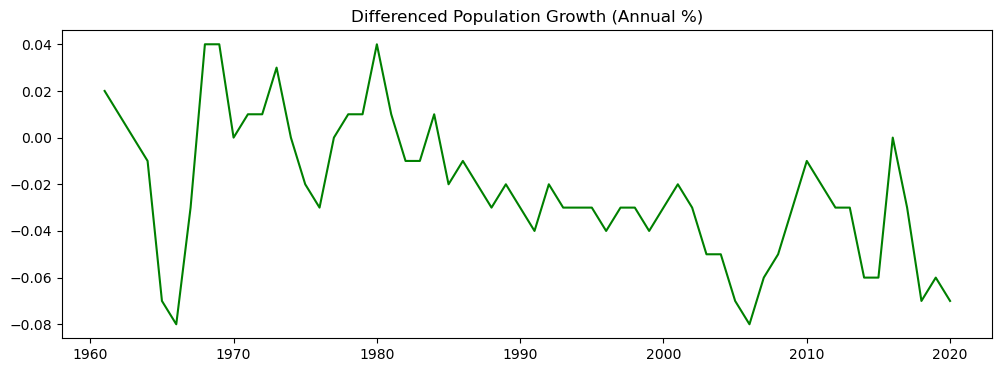

In [49]:
plt.figure(figsize=(12, 4))
plt.plot(df['Year'], df['Population_growth_diff'], label='Population Growth Difference', color='green')
plt.title('Differenced Population Growth (Annual %)')

In [50]:
from statsmodels.tsa.api import VAR

In [51]:
df_var = df[['GDP_log_diff', 'GDP growth (annual %)','Inflation_diff', 'Population_growth_diff']].dropna()

In [52]:
# Fit the VAR model
model = VAR(df_var)
lag_order = model.select_order(maxlags=5)
print(lag_order.summary())

var_result = model.fit(lag_order.aic)
print(var_result.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -1.897      -1.726      0.1501      -1.836
1      -2.702     -1.848*     0.06749     -2.395*
2      -2.684      -1.149     0.07062      -2.133
3      -2.774     -0.5562     0.06937      -1.978
4      -2.914    -0.01306     0.06970      -1.873
5     -3.258*      0.3250    0.06394*      -1.973
-------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 12, Oct, 2024
Time:                     15:32:22
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   0.324983
Nobs:                     39.0000    HQIC:                  -1.97250
Log likelihood:          -73.8220    FPE:                  0.0639359
AIC:                     -3.25807    Det(Omega_ml

In [53]:
# Forecasting the next 5 steps
forecast_steps = 5
var_forecast = var_result.forecast(df_var.values[-lag_order.aic:], steps=forecast_steps)

forecast_df = pd.DataFrame(var_forecast, index=pd.date_range(start='2021', periods=forecast_steps, freq='Y'), 
                           columns=df_var.columns)
print(forecast_df)

            GDP_log_diff  GDP growth (annual %)  Inflation_diff  \
2021-12-31      2.841092              10.339610        2.898427   
2022-12-31     -0.347055              13.326869       -3.478012   
2023-12-31     -1.109236               5.391691       -3.294684   
2024-12-31      1.220277               8.269246       -1.412515   
2025-12-31     -1.555020               8.269909       -0.976198   

            Population_growth_diff  
2021-12-31               -0.073773  
2022-12-31               -0.079595  
2023-12-31               -0.051096  
2024-12-31               -0.045971  
2025-12-31               -0.072254  


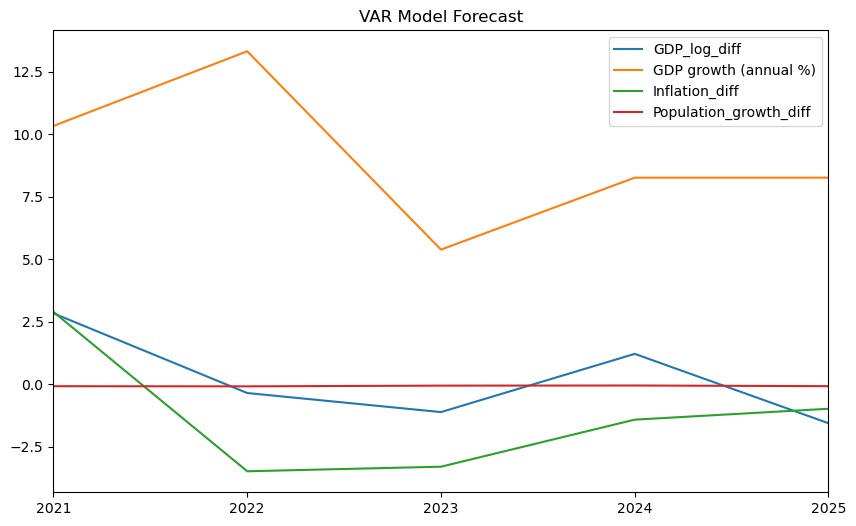

In [54]:
# Plot the forecasts
forecast_df.plot(figsize=(10, 6))
plt.title('VAR Model Forecast')
plt.show()

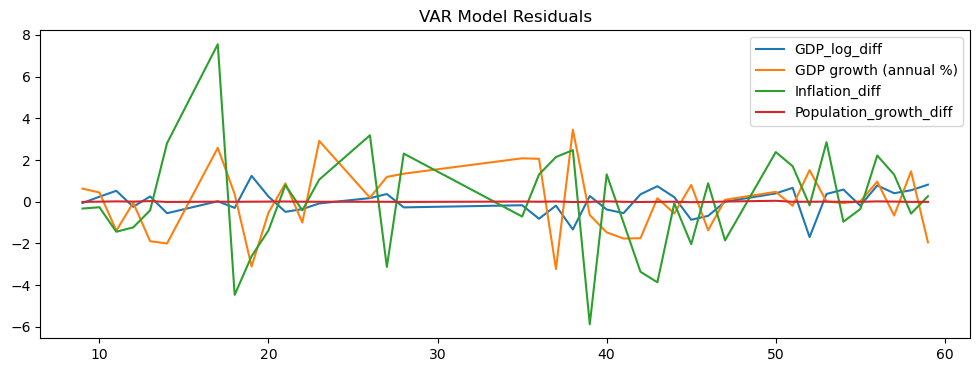

In [55]:
# Residuals from the VAR model
residuals = var_result.resid

plt.figure(figsize=(12, 4))
plt.plot(residuals.index, residuals['GDP_log_diff'], label='GDP_log_diff')
plt.plot(residuals.index, residuals['GDP growth (annual %)'], label='GDP growth (annual %)')
plt.plot(residuals.index, residuals['Inflation_diff'], label='Inflation_diff')
plt.plot(residuals.index, residuals['Population_growth_diff'], label='Population_growth_diff')
plt.title("VAR Model Residuals")
plt.legend(loc='best')
plt.show()

In [56]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [57]:
ljung_box_results = {}

for column in residuals.columns:
    print(f"\nLjung-Box Test for {column}:")
    ljung_box = acorr_ljungbox(residuals[column], lags=[10], return_df=True)
    print(ljung_box)
    ljung_box_results[column] = ljung_box  


Ljung-Box Test for GDP_log_diff:
     lb_stat  lb_pvalue
10  2.254552   0.993991

Ljung-Box Test for GDP growth (annual %):
      lb_stat  lb_pvalue
10  11.322674   0.332937

Ljung-Box Test for Inflation_diff:
     lb_stat  lb_pvalue
10  4.017014   0.946576

Ljung-Box Test for Population_growth_diff:
      lb_stat  lb_pvalue
10  11.161494   0.345075


# Granger Causality Test

In [58]:
from statsmodels.tsa.stattools import grangercausalitytests

In [59]:
maxlag = 5

In [60]:
for col in df_var.columns:
    print(f"\nGranger Causality Test for {col} being caused by other variables:\n")
    for other_col in df_var.columns:
        if col != other_col:
            print(f"Testing if {other_col} Granger-causes {col}:")
            grangercausalitytests(df_var[[col, other_col]], maxlag=maxlag, verbose=True)


Granger Causality Test for GDP_log_diff being caused by other variables:

Testing if GDP growth (annual %) Granger-causes GDP_log_diff:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1097  , p=0.2985  , df_denom=40, df_num=1
ssr based chi2 test:   chi2=1.1929  , p=0.2747  , df=1
likelihood ratio test: chi2=1.1766  , p=0.2780  , df=1
parameter F test:         F=1.1097  , p=0.2985  , df_denom=40, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3766  , p=0.6888  , df_denom=37, df_num=2
ssr based chi2 test:   chi2=0.8551  , p=0.6521  , df=2
likelihood ratio test: chi2=0.8465  , p=0.6549  , df=2
parameter F test:         F=0.3766  , p=0.6888  , df_denom=37, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3762  , p=0.7707  , df_denom=34, df_num=3
ssr based chi2 test:   chi2=1.3611  , p=0.7147  , df=3
likelihood ratio test: chi2=1.3390  , p=0.7199  , df=3
parameter F test:         F=0.3762 